# TUGAS 4

In [2]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import joblib

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Feb11F/dataset/main/beritabantn.csv')
df

,Judul,Isi,Kategori
0,"Rambu Lalu Lintas di Jalan Tol Dicuri, Pengelo...",KAB. SERANG– Sejumlah rambu lalu lintas di Tol...,hukum
1,Arab Saudi Jadi Tuan Rumah Piala Dunia 2034 Se...,JAKARTA– Arab Saudi akan menjadi tuan rumah Pi...,Sport
2,107 Anggota Jaringan JI dan JAD Asal Banten Le...,SERANG– Sebanyak 107 orang mantan anggota Jema...,hukum
3,Relawan Ganjar Mahfud Gelar Pengukuhan Gapura ...,LEBAK –Relawan Ganjar Pranowo dan Mahfud MD me...,Politik
4,Dua Warga Lebak Tewas Tertimbun Galian Tanah,LEBAK– Diki (19) warga Kecamatan Sajira dan Ad...,hukum
5,Gibran Rakabuming Siap Hadapi Mahfud MD dan Ca...,"SERANG– Calon wakil Presiden (Cawapres), Gibra...",Politik
6,1.333 Caleg DPRD Banten Resmi Masuk DCT Pemilu...,SERANG– Sebanyak 1.333 calon anggota legislati...,Politik
7,Kades Lontar Akui Pakai Duit Desa untuk Hibura...,SERANG– Sidang kasus korupsi dana Desa Lontar ...,hukum
8,Polisi Tahan Pengelola Korsel yang Tewaskan Bo...,SERANG– Pengelola korsel di Kampung Cileuweung...,hukum
9,"Usai Video Mesum Viral, Mantan Guru di Carenan...","KAB. SERANG– Usai kasusnya viral, seorang mant...",hukum


In [4]:
df = df.dropna()
df.isnull().sum()

Judul       0
Isi         0
Kategori    0
dtype: int64

In [7]:
def cleaning(text):
  text = re.sub(r'[^\w\s.?!,]', '', text).strip()
  return text

df['Cleaning'] = df['Isi'].apply(cleaning)
df['Cleaning']

0     KAB. SERANG Sejumlah rambu lalu lintas di Tol ...
1     JAKARTA Arab Saudi akan menjadi tuan rumah Pia...
2     SERANG Sebanyak 107 orang mantan anggota Jemaa...
3     LEBAK Relawan Ganjar Pranowo dan Mahfud MD men...
4     LEBAK Diki 19 warga Kecamatan Sajira dan Adend...
5     SERANG Calon wakil Presiden Cawapres, Gibran R...
6     SERANG Sebanyak 1.333 calon anggota legislatif...
7     SERANG Sidang kasus korupsi dana Desa Lontar K...
8     SERANG Pengelola korsel di Kampung Cileuweung,...
9     KAB. SERANG Usai kasusnya viral, seorang manta...
10    SERANG  Turnamen futsal terbesar antarSMA seIn...
11    PANDEGLANG Satuan Reserse Kriminal Satreskrim ...
12    TANGSEL Anggota DPRD Provinsi Banten, Yudi Bud...
13    TANGERANG Kota Tangerang dipercaya menjadi tua...
14    SERANG Ketua Majelis Kehormatan Mahkamah Konst...
15    SERANG Mantan Kepala Desa Lontar, Kecamatan Ti...
16    JAKARTA Pemain Timnas Indonesia U17 Welber Jar...
17    JAKARTA Anggota III Badan Pemeriksa Keuang

In [8]:
def tokenizer(text):
  text = text.lower()
  return sent_tokenize(text)

df['Tokenizing'] = df['Cleaning'].apply(tokenizer)
df['Tokenizing']

0     [kab., serang sejumlah rambu lalu lintas di to...
1     [jakarta arab saudi akan menjadi tuan rumah pi...
2     [serang sebanyak 107 orang mantan anggota jema...
3     [lebak relawan ganjar pranowo dan mahfud md me...
4     [lebak diki 19 warga kecamatan sajira dan aden...
5     [serang calon wakil presiden cawapres, gibran ...
6     [serang sebanyak 1.333 calon anggota legislati...
7     [serang sidang kasus korupsi dana desa lontar ...
8     [serang pengelola korsel di kampung cileuweung...
9     [kab., serang usai kasusnya viral, seorang man...
10    [serang  turnamen futsal terbesar antarsma sei...
11    [pandeglang satuan reserse kriminal satreskrim...
12    [tangsel anggota dprd provinsi banten, yudi bu...
13    [tangerang kota tangerang dipercaya menjadi tu...
14    [serang ketua majelis kehormatan mahkamah kons...
15    [serang mantan kepala desa lontar, kecamatan t...
16    [jakarta pemain timnas indonesia u17 welber ja...
17    [jakarta anggota iii badan pemeriksa keuan

In [9]:
def graph_cosine_sim(x, threshold = 0.11):
  # TFIDF
  vectorizer = TfidfVectorizer()
  tfidf = vectorizer.fit_transform(x)
  cos_sim = cosine_similarity(tfidf)
  G = nx.Graph()

  # Mengisi nilai similarity antara kalimat ke dalam edges (Garis Penghubung)
  for i in range(len(x)):
    for j in range(i+1, len(x)):
      sim = cos_sim[i][j]
      if sim > threshold:
        G.add_edge(i, j, weight=sim)

  return G

In [10]:
def plot_graph(G, figsize=(35, 30), node_size=700, node_color='skyblue'):
  # Menggambar graf dengan canvas yang diperbesar
  pos = nx.spring_layout(G)  # Menentukan posisi simpul
  labels = nx.get_edge_attributes(G, 'weight')

  # Menentukan ukuran canvas
  plt.figure(figsize=(35, 30))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
  plt.show()

In [11]:
def summarization(x, k = 4, index=1, threshold=0.11, show_centrality=False):
  # Memasukkan Nilai Cosine Similirity ke dalam Graph
  G = graph_cosine_sim(x, threshold)

  # Menghitung nilai dari closeness centrality
  centrality = nx.closeness_centrality(G)
  if show_centrality:
    print(f"Nilai Closeness Centrality Dokumen Ke - {index} : {centrality}")

  # Menyusun Kalimat berdasarkan nilai Closeness Centrality tertinggi dan lebih dari treshold
  centrality = dict(sorted(centrality.items(), key=lambda item : item[1], reverse=True))

  summary_sentences = []
  for i, centr in enumerate(centrality.items()):
    if i < k:
      summary_sentences.append(x[centr[0]])

  return (' '.join(summary_sentences), G)

In [12]:
summary, G = summarization(df["Tokenizing"].iloc[:1][0], k = 5, show_centrality=True, threshold=0.2)

Nilai Closeness Centrality Dokumen Ke - 1 : {1: 0.6666666666666666, 3: 1.0, 2: 0.6666666666666666}


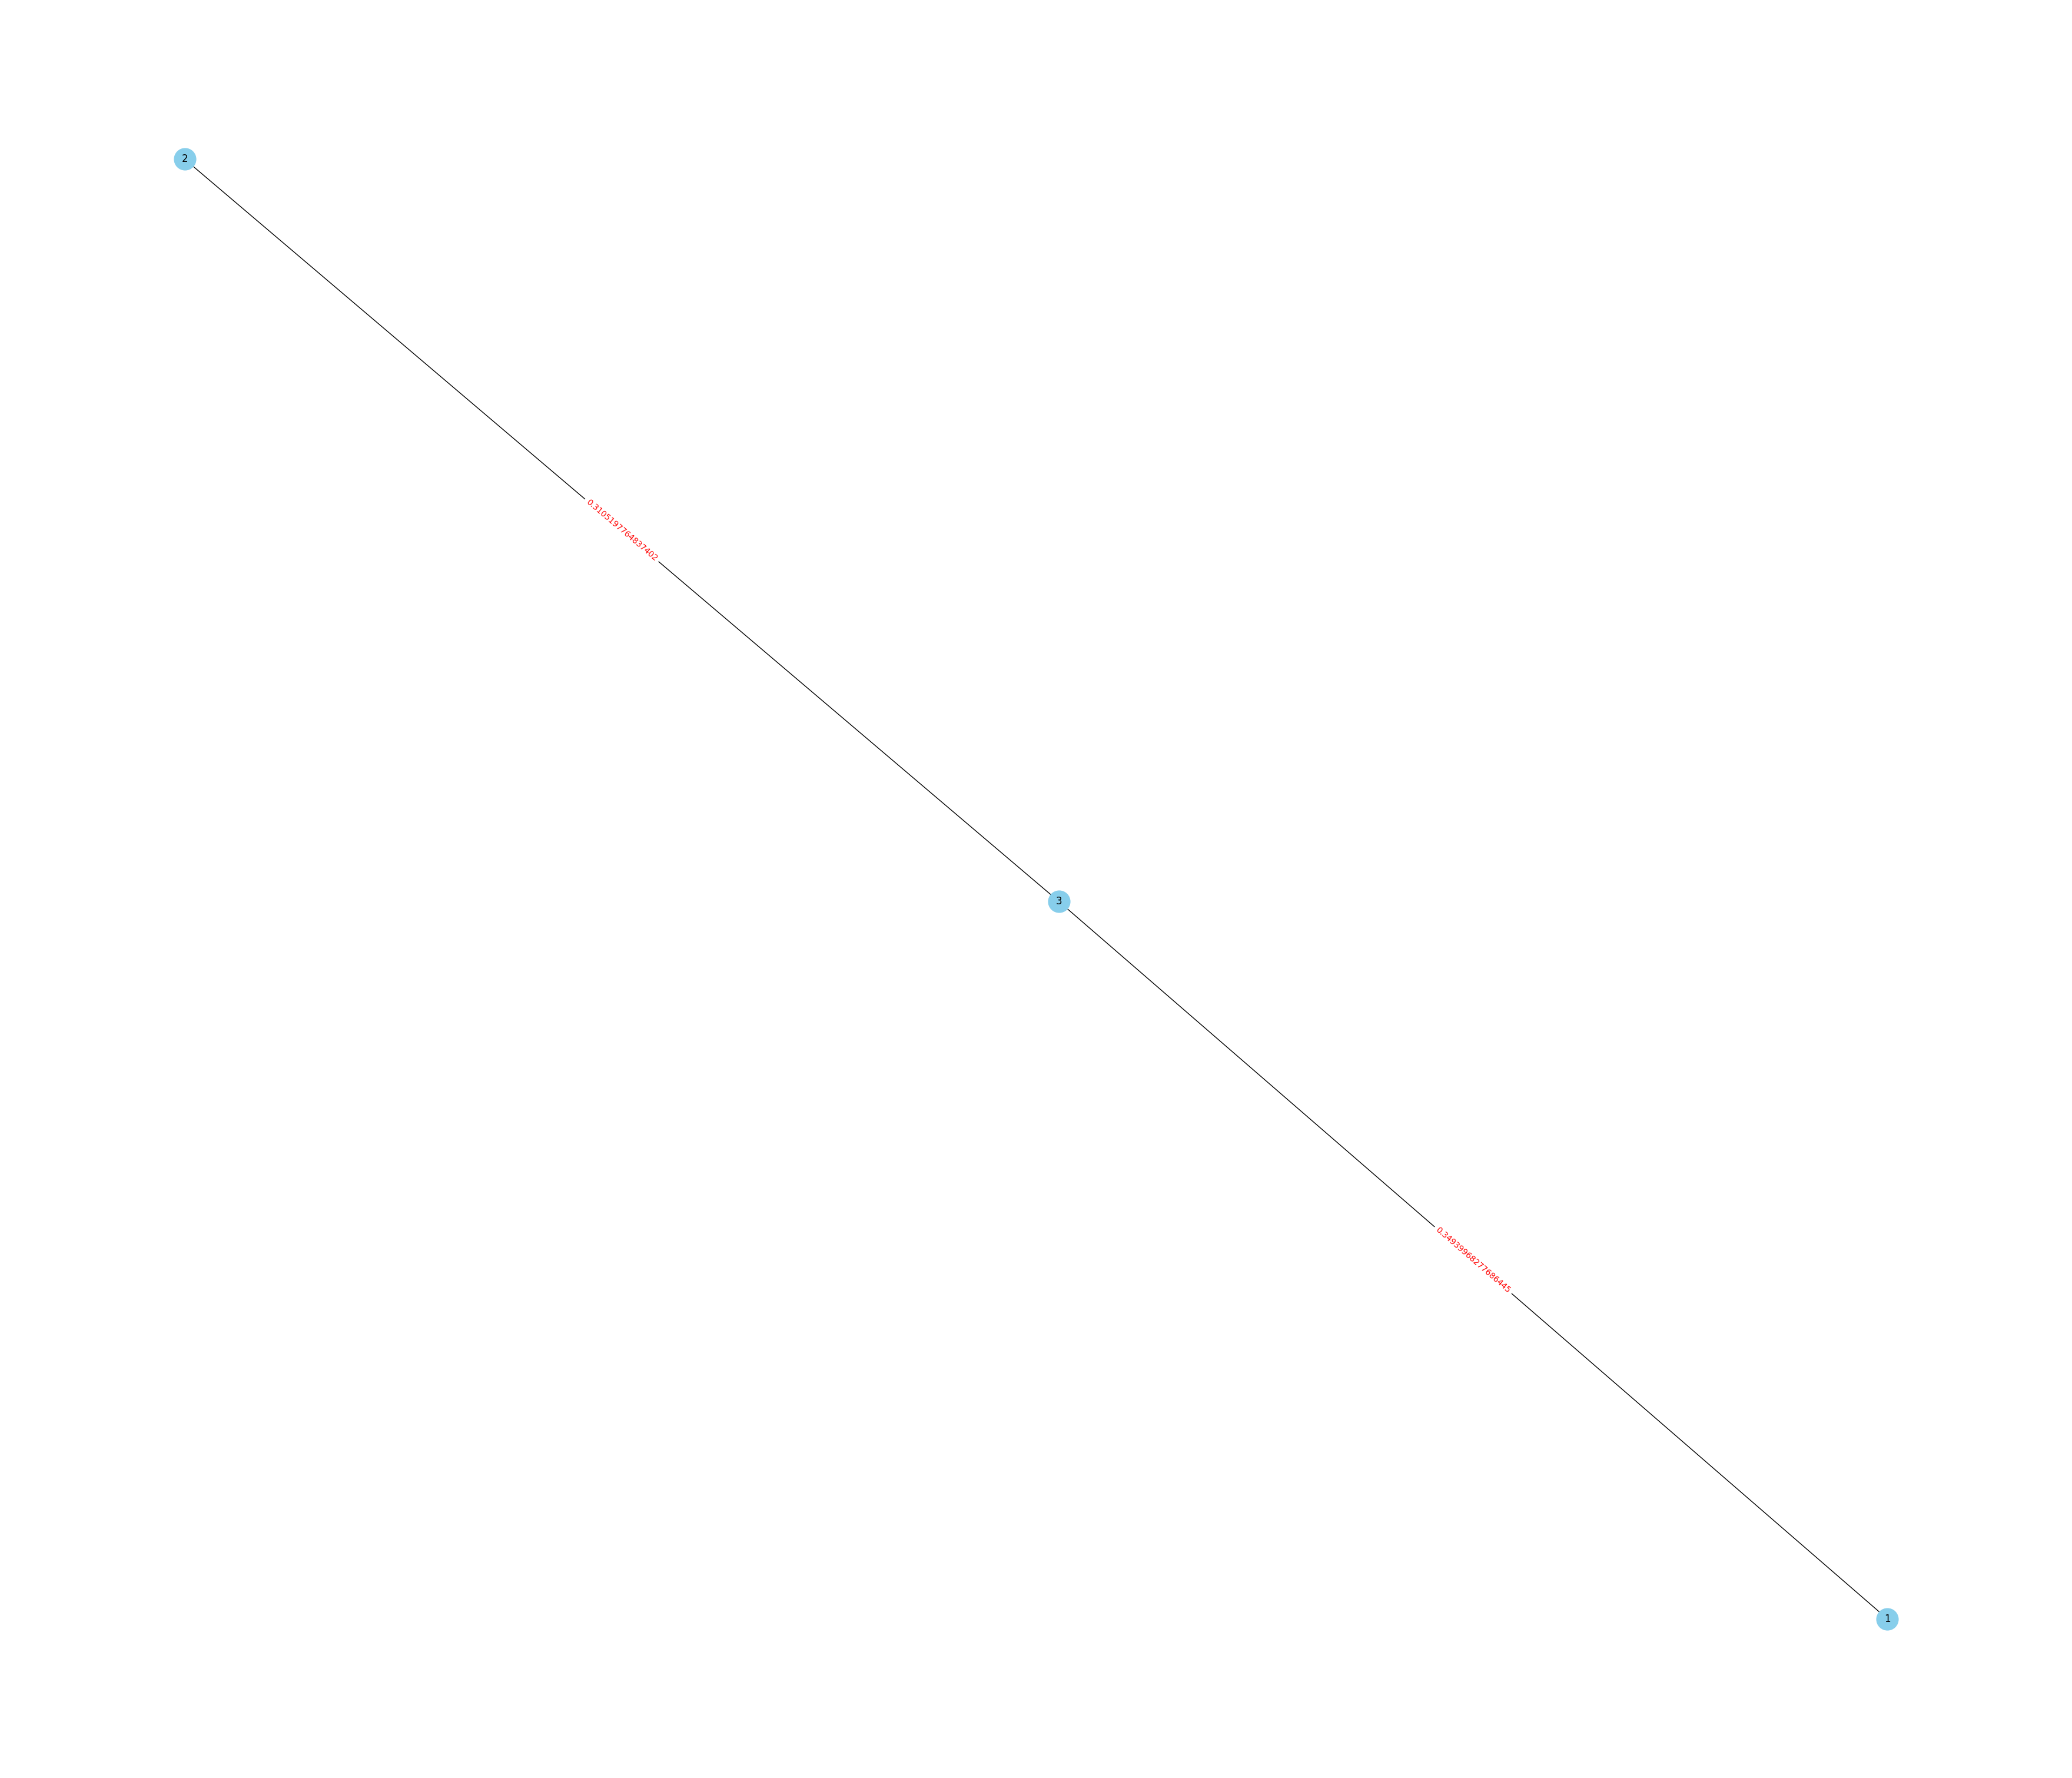

In [13]:
plot_graph(G)

In [14]:
df["Summary"] = df.apply(lambda row : summarization(row['Tokenizing'], index=row.name+1, k=7, show_centrality=True)[0], axis=1)

Nilai Closeness Centrality Dokumen Ke - 1 : {1: 0.75, 3: 0.75, 5: 0.5, 2: 0.5}
Nilai Closeness Centrality Dokumen Ke - 2 : {0: 1.0, 1: 1.0, 2: 1.0}
Nilai Closeness Centrality Dokumen Ke - 3 : {0: 1.0, 1: 1.0}
Nilai Closeness Centrality Dokumen Ke - 4 : {}
Nilai Closeness Centrality Dokumen Ke - 5 : {0: 0.8333333333333334, 1: 0.5, 3: 0.7142857142857143, 4: 0.8333333333333334, 5: 0.625, 2: 0.5555555555555556}
Nilai Closeness Centrality Dokumen Ke - 6 : {0: 0.2, 1: 0.2, 2: 0.3, 3: 0.44999999999999996, 4: 0.44999999999999996, 5: 0.3}
Nilai Closeness Centrality Dokumen Ke - 7 : {0: 0.7272727272727273, 1: 0.8, 2: 0.8, 4: 0.8, 5: 0.8, 6: 1.0, 3: 0.7272727272727273, 7: 0.5714285714285714, 8: 0.5714285714285714}
Nilai Closeness Centrality Dokumen Ke - 8 : {0: 0.8333333333333334, 1: 0.5555555555555556, 2: 0.7142857142857143, 3: 0.7142857142857143, 5: 0.5, 4: 0.45454545454545453}
Nilai Closeness Centrality Dokumen Ke - 9 : {1: 0.42857142857142855, 8: 0.6666666666666666, 2: 0.5454545454545454, 3: 

In [15]:
new_df = df[["Summary", "Kategori"]]
new_df

,Summary,Kategori
0,serang sejumlah rambu lalu lintas di tol tange...,hukum
1,jakarta arab saudi akan menjadi tuan rumah pia...,Sport
2,serang sebanyak 107 orang mantan anggota jemaa...,hukum
3,,Politik
4,lebak diki 19 warga kecamatan sajira dan adend...,hukum
5,dia menyerahkan keputusannya kepada pdip.ya it...,Politik
6,berkurangnya calon tersebut ada pada 3 partai ...,Politik
7,serang sidang kasus korupsi dana desa lontar k...,hukum
8,"diduga, korban tersetrum karena memegang pagar...",hukum
9,ketika itu dia sudah bukan lagi menjadi guru m...,hukum


In [16]:
new_df.to_csv('Data Berita Hasil Ringkasan.csv')

In [17]:
df["Summary"][0]

'serang sejumlah rambu lalu lintas di tol tangerang  merak dan serang  panimbang tepatnya di kabupaten serang, banten hilang. namun juga berpotensi menyebabkan kecelakaan pada pengguna jalan.kalau ramburambu ini kaitannya dihilangkan ini menjadi potensi kecelakaan bagi pengguna jalan, ujarnya pada konferensi pers terkait penangkapan 6 pencuri rambu tol di mapolres serang, selasa 24102023.baca jugakomplotan pencuri rambu lalu lintas di jalan tol tangerang  merak dan serpan dibekuk polisisamsul menjelaskan para pengguna jalan bisa mengalami kebingungan lantaran petunjuk arah atau peringatan di jalan tol tidak ada.pertama pengguna jalan kehilangan arah apakah ini tadinya kecepatannya berapa atau dilarang parkir atau petunjukpetunjuk lainnya sehingga pembuat jalan agak kehilangan arah kebingungan, tambahnya.sebelumnya diwartakan, enam pencuri rambu lalu lintas di jalan tol tangerang  merak dan serang  panimbang tepatnya di wilayah kabupaten serang, banten ditangkap polisi. hasil barang cur

In [19]:
vectorizer_summary = TfidfVectorizer()
X_summary = vectorizer_summary.fit_transform(df["Summary"]).toarray()
y = df["Kategori"]

In [20]:
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(X_summary, y, test_size=0.3, random_state=42)

In [22]:
# Inisialisasi model Naive Bayes Gaussian
gnb_summary = GaussianNB()

# Melatih model menggunakan data latih
gnb_summary.fit(X_train_summary, y_train_summary)

# Membuat prediksi pada data uji
y_pred_gnb_summary = gnb_summary.predict(X_test_summary)

In [23]:
# Mengukur kinerja model dengan menghitung akurasi atau metrik lain yang relevan
accuracy = accuracy_score(y_test_summary, y_pred_gnb_summary)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0


In [24]:
report = classification_report(y_test_summary, y_pred_gnb_summary)
print(f'Report Klasifikasi:\n{report}')

Report Klasifikasi:
              precision    recall  f1-score   support

     Politik       1.00      1.00      1.00         1
       Sport       1.00      1.00      1.00         1
       hukum       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



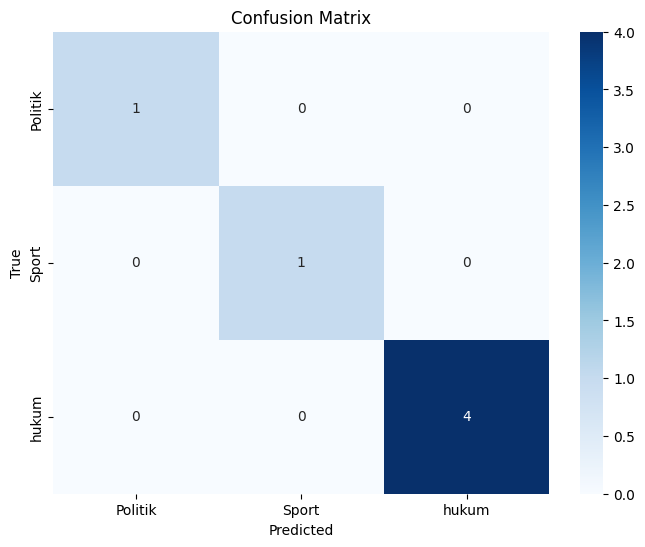

In [25]:
def plot_confusion_matrix(cm):
  # Membuat plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb_summary.classes_, yticklabels=gnb_summary.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

cm = confusion_matrix(y_test_summary, y_pred_gnb_summary)
plot_confusion_matrix(cm)

In [28]:
new_data = ["SERANG – Prajurit Grup 1 Kopassus kembali menorehkan prestasi dalam bidang Lomba Lari pada CT Arsa Charity Fun Run 2023 di BSD Tanggerang dan Kota Wisata Run 2023 di Malang. Pada even tersebut yang digelar Sabtu, 18 November 2023 prajurit Grup 1 Kopassus menorehkan 2 prestasi pada even Lari Kategori 10 K. Praka Gunawan berhasil mendatkan Juara 3 dengan waktu 33’50. Sedangakan Sertu Amat Sucipto Parapat mendapatkan Juara 4 dengan waktu 33’51. Berbeda dengan 2 Prajurit Grup 1 Kopassus lainnya yang juga mengukir prestasi dalam Lomba Lari Kota Wisata Run 2023 di Malang hari Minggu, 19 November 2023. Prajurit Grup 1 Kopassus dapat menorehkan prestasi puncak pada even Lari Kategori 10 K. Sertu Amat Sucipto Parapat mendapatkan juara 1 dengan waktu 33’33” dan Amirudin mendapatkan Juara 3 dengan waktu 35’20”. Prestasi tersebut tentunya tidak terlepas dari arahan dan program yang diberikan oleh Komandan Grup 1 Kopassus, Kolonel Inf Irfan Amir. Prestasi ini tentunya sebagai motivasi untuk terus memberikan hasil yang terbaik dalam setiap even perlombaan yang dilaksanakan."]
new_data_summary, G = summarization(tokenizer(new_data[0]), k=5)
new_data_summary

'pada even tersebut yang digelar sabtu, 18 november 2023 prajurit grup 1 kopassus menorehkan 2 prestasi pada even lari kategori 10 k. praka gunawan berhasil mendatkan juara 3 dengan waktu 33’50. berbeda dengan 2 prajurit grup 1 kopassus lainnya yang juga mengukir prestasi dalam lomba lari kota wisata run 2023 di malang hari minggu, 19 november 2023. prajurit grup 1 kopassus dapat menorehkan prestasi puncak pada even lari kategori 10 k. sertu amat sucipto parapat mendapatkan juara 1 dengan waktu 33’33” dan amirudin mendapatkan juara 3 dengan waktu 35’20”. serang – prajurit grup 1 kopassus kembali menorehkan prestasi dalam bidang lomba lari pada ct arsa charity fun run 2023 di bsd tanggerang dan kota wisata run 2023 di malang. sedangakan sertu amat sucipto parapat mendapatkan juara 4 dengan waktu 33’51. prestasi tersebut tentunya tidak terlepas dari arahan dan program yang diberikan oleh komandan grup 1 kopassus, kolonel inf irfan amir.'

In [29]:
tfidf_Xnew_summary = vectorizer_summary.transform([new_data_summary]).toarray()
tfidf_Xnew_summary

array([[0.        , 0.        , 0.17531058, ..., 0.        , 0.        ,
        0.        ]])

In [30]:
pred_gnb_summary = gnb_summary.predict(tfidf_Xnew_summary)
pred_gnb_summary[0]

'Sport'

In [31]:
joblib.dump(gnb_summary, 'modelNB.pkl')

['modelNB.pkl']